<a href="https://colab.research.google.com/github/MarcosMota/AnaliseDeSentimento/blob/master/Reviews_de_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


# O Problema
![alt text](https://github.com/MarcosMota/AnaliseDeSentimento/blob/master/images/olist.png?raw=true)



Olist é um intermediario entre lojistas e marketplaces, ela permite o lojista gerenciar toda operação de venda de um único lugar e publicar seus produtos em grandes marketplaces, como:

- Mercado Livre
- Walmart
- Submarino
- Americanas
- Extra.com
- Casas Bahia
- Pontofrio
- Entre outros.

Com o objetivo de ajudar os lojistas melhorarem o atendimento ao cliente iremos construir uma algoritmo que nos aponte a satisfação de um cliente.


#Conjunto de Dados
Este é um conjunto de dados 
O conjunto de dados possui informações de 100 mil pedidos de 2016 a 2018 feitos em vários mercados no Brasil. Seus recursos permitem visualizar um pedido de várias dimensões: 

- Status do pedido
- Preço
- Pagamento
- Desempenho do frete à localização do cliente
- Produto
- **Reviews escritas pelos clientes.**

## Reviews

Após que um cliente compra o produto na Olist Store, um vendedor é notificado para atender a esse pedido. Depois que o cliente recebe o produto ou a data estimada de entrega é vencida, ele recebe uma pesquisa de satisfação por e-mail, onde pode anotar a experiência da compra e anotar alguns comentários.

In [2]:
url_dataset = 'https://raw.githubusercontent.com/MarcosMota/AnaliseDeSentimento/master/dataset/olist_order_reviews_dataset.csv'
reviews = pd.read_csv(url_dataset)
reviews.head()



,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
print(f'Quantidade de observações: {reviews.shape[0]}\n')

Quantidade de observações: 100000



##Dados Nulos
Como podemos ver nosso dataset contém muitos dados nulos, principalmente na nossa variavel principal de analise **review_comment_message**. Uma suposição é que nem todas pessoas que compraram comentaram sobre o produto.

In [4]:
hasNull = reviews.isnull().any().any()

if hasNull :
  print(f'{round((reviews.count()/reviews.isnull().sum()) * 100).replace([np.inf, -np.inf], 0),2}\n')



(review_id                   0.0
order_id                    0.0
review_score                0.0
review_comment_title       13.0
review_comment_message     72.0
review_creation_date        0.0
review_answer_timestamp     0.0
dtype: float64, 2)



A maneira mais simples e eficaz para se resolver neste caso específico é remover todos os dados nulos da nossa variavel principal **review_comment_message**.

In [5]:
 reviews = reviews.dropna(subset=['review_comment_message'])
 print(f'Quantidade de observações: {reviews.shape[0]}\n')

Quantidade de observações: 41753



## Rotulação


*   1 - Positiva
*   0 - Neutro
*   -1 - Negativa



In [91]:
pontos = [0, 2, 5]
polaridades = [0, 1]
reviews['polarity'] = pd.cut(reviews['review_score'], bins=pontos, labels=polaridades)
reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,polarity
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,1
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,1
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,1
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45,0
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,0
22,d21bbc789670eab777d27372ab9094cc,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00,2018-07-11 14:10:25,1
24,0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5,NaN,obrigado pela atençao amim dispensada,2017-12-01 00:00:00,2017-12-09 22:58:58,1
27,fe3db7c069d694bab50cc43463f91608,2ca73e2ff9e3a186ad1e1ffb9b1d9c10,5,NaN,A compra foi realizada facilmente.\r\nA entreg...,2018-03-23 00:00:00,2018-04-01 00:27:51,1


## Analise Exploratória

In [92]:
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('portuguese')
from wordcloud import WordCloud, ImageColorGenerator

def plotWordCloud(text):
  text = " ".join(s for s in text)
  # cria um wordcloud
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        width=1600, height=800).generate(text)

  # plota o wordcloud
  fig, ax = plt.subplots(figsize=(10,6))
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.set_axis_off()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### O que as pessoas estão dizendo?



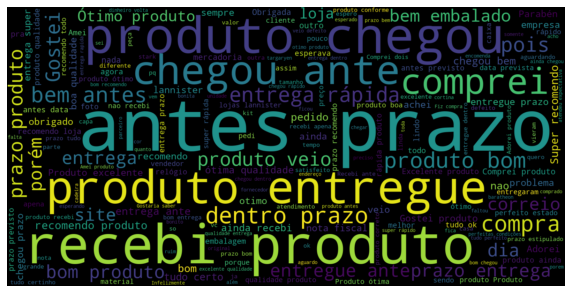

In [93]:
text = reviews['review_comment_message']
plotWordCloud(text)

### O que as pessoas estão dizendo quando estão satisfeitas?

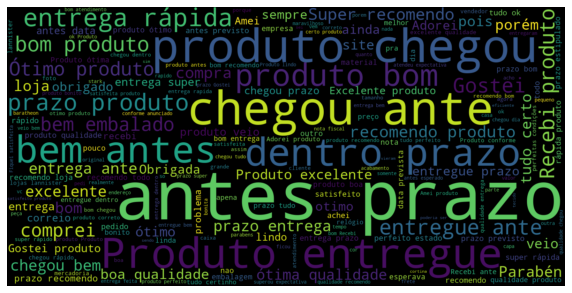

In [94]:
text = reviews[reviews.polarity == 1]['review_comment_message']
plotWordCloud(text)

### O que as pessoas estão dizendo quando estão insatisfeitas?

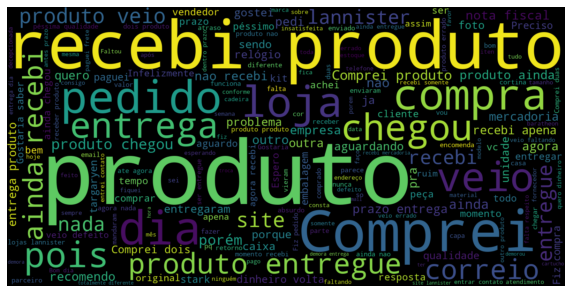

In [95]:
text = reviews[reviews.polarity == 0]['review_comment_message']
plotWordCloud(text)

#Pre Processamento
A etapa de pré processamento gasta 80% do tempo total gasto na maioria dos projetos de ciência de dados é gasto na limpeza e pré-processamento dos dados. Dessa forma, vamos construir nossa solução de modo que possibilite automatizar e reutilizar as etapas criadas nesse projeto.



## Selecionar Features




In [96]:
colunas = ['review_comment_message','polarity']
data = reviews[colunas]
data.head()

,review_comment_message,polarity
3,Recebi bem antes do prazo estipulado.,1
4,Parabéns lojas lannister adorei comprar pela I...,1
9,aparelho eficiente. no site a marca do aparelh...,1
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",1
15,"Vendedor confiável, produto ok e entrega antes...",1


## Pipeline
Iremos utilizar os Pipelines do Scikit-Learn, que são compostos por etapas baseadas em heranças, das quais cada etapa poderá ser um transformador. 

In [97]:
# Importações
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import re
import nltk
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('rslp')
# Stop Words em Português
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('portuguese')


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
texto = ['O produto chegou\n Porem ele está quebrado, quero os meus R$12 de volta. \n\r']

### Limpeza do Texto


In [0]:
class LimpezaPipe(BaseEstimator, TransformerMixin):
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        texto_transformado = []
        for texto in X:
          # Remover quebras de linha
          texto = re.sub('\n', ' ', texto)

          # Remover carriage return
          texto = re.sub('\r', ' ', texto)

          # Substituir numero pela palavra 'número'  
          texto = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', ' numero ', texto)

          # Remover os alfas núméricos
          texto = re.sub(r'R\$', ' ', texto)
          texto = re.sub(r'\W', ' ', texto)
          texto = re.sub(r'\s+', ' ', texto)

          # Remover os hyperlinks
          urls = re.findall('(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', texto)
          if len(urls) == 0:
              pass
          else:
              for url in urls:
                  for link in url:
                      texto = texto.replace(link, '')
              texto = texto.replace(':', '')
              texto = texto.replace('/', '')
          
          texto_transformado.append(texto)
        return texto_transformado

In [108]:
limpezaPipe = LimpezaPipe()
texto = limpezaPipe.transform(texto)
texto

['O produto chegou Porem ele está quebrado quero os meus numero de volta ']

### Stop Words



In [0]:
import string
class StopWordsPipe(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def _removeStopPipe(self, text):
      nopunc = [char for char in text if char not in string.punctuation]
      nopunc = ''.join(nopunc)
      return [word for word in nopunc.split() if word.lower() not in STOPWORDS]

    def transform(self, X, y=None):
      texto_transformado = list(map(lambda c: self._removeStopPipe(c), X))
      texto_transformado = list(map(lambda x: ' '.join(x), texto_transformado))
      return texto_transformado

In [110]:
stopwordsPipe = StopWordsPipe()
texto = stopwordsPipe.transform(texto)
texto

['produto chegou Porem quebrado quero numero volta']

### Stemming

É a técnica que reduz um termo ao seu radical, removendo afixos e vogais temáticas. Um do seus objetivos é reduzir a quantidade de palavras na base de dados. A redução de vocabulário permite maior velocidade de processamento e menor número de erros causados por combinações não previstas.

Exemplos:

*   **Frequentemente** se torna “Frequent”
*   **Copiar** se torna “Copi”


In [0]:
class SteammingPipe(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def _applySteaming(self, c):
        stemmer = RSLPStemmer()
        return list(map(lambda x: stemmer.stem(x), [word for word in c.split()]))
    
    def transform(self, X, y=None):
        texto_transformado = list(map(lambda c: self._applySteaming(c), X))
        texto_transformado = list(map(lambda x: ' '.join(x), texto_transformado))
        return texto_transformado

In [112]:
steammingPipe = SteammingPipe()
texto = steammingPipe.transform(texto)
texto

['produt cheg por quebr quer numer volt']

### Construção do Pipeline

In [0]:
pipe_preprocessamento = Pipeline([
    ('limpeza', LimpezaPipe()),
    ('stopwords', StopWordsPipe()),
    ('stemming', SteammingPipe()),
])

In [0]:

review_comment_message = data['review_comment_message']
X_preprocessed = pipe_preprocessamento.fit_transform(review_comment_message)

In [0]:
review_comment_message[2]

In [0]:

vectorizer = CountVectorizer(max_features=300, stop_words=stopwords.words('portuguese'))
X_transformed = vectorizer.fit_transform(X_preprocessed).toarray()


In [118]:
# Checking
X_transformed[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#Treinamento

In [0]:
resultados = []

In [0]:
def mostrarPolaridade(pred):
    if pred[0] == 1:
        return 'Positivo'
    elif pred[0] == 0:
        return 'Negativo'

## Separar dados de treinamento

In [0]:
from sklearn.model_selection import train_test_split
y = reviews['polarity'].values
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=.30, random_state=42)


## Regressão Logistica
![alt text](https://dphi.tech/wp-content/uploads/2020/04/LR_1.gif)

In [123]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# Treinamento
log_reg = LogisticRegression( max_iter=1000,  dual=False)
log_reg.fit(X_train, y_train,)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
# Validação
acc = cross_val_score(log_reg, X_test, y_test, cv=5, scoring='accuracy')
acc.mean()


0.8684343682945361

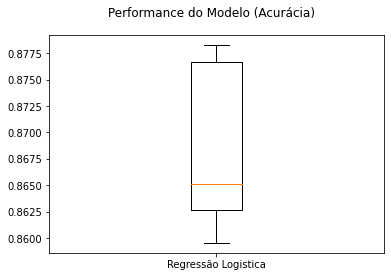

In [132]:
fig = plt.figure()
fig.suptitle('Performance do Modelo (Acurácia)')
ax = fig.add_subplot(111)
ax.set_xticklabels(['Regressão Logistica'])
plt.boxplot(acc)
plt.show()

### Validação

In [130]:
frase = ['Muito bom! Adorei o produto e a loja forneceu um serviço excelente. Qualidade!']
frase_preprocessed = pipe_preprocessamento.fit_transform(frase)

# Vectorizing
frase_transformed = vectorizer.transform(frase_preprocessed).toarray()
pred = log_reg.predict(frase_transformed)
mostrarPolaridade(pred)

'Positivo'